# <span style="color: #FF0000">Algorithme kNN sur des données de cancer du sein</span>

### Chargement des bibliothèques nécessaires

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from random import randint
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from random import randint

### Chargement des données sur le cancer du sein

```python
X,y = load_breast_cancer(True)
```

In [4]:
X,y = load_breast_cancer(True)

Le dataset comporte 569 cas et pour chacun 30 valeurs numériques liées à des caractéristiques des cellules prélevées. Ces caractéristiques ont été mesurées sur des images numérisées de ces cellules.

In [3]:
X.shape

(569, 30)

On peut accéder, avec quelques lignes de code, à beaucoup d'informations concernant ces données comme:

```python
bun = load_breast_cancer()

for val in bun['feature_names']:
    print(val)
    
print(bun['target_names'])

print(bun['DESCR'])

```

 - les caractéristiques stockées pour chaque cas

```python
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
```

 - les catégories

```python
['malignant' 'benign']
```

 - une description précise des données

```python
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.
```

### Séparation des données en ensemble de test et ensemble d'entrainement

```python
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
```

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

### Comparaison avec k voisins et choix de la meilleure valeur de k

On teste les valeurs de k comprises entre 1 et 14 et on mesure l'erreur faite sur l'ensemble de test.

```python
fig3=plt.figure("Figure 3")
ax3=fig3.add_subplot(1,1,1)
errors = []
for k in range(1,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
ax3.plot(range(1,15), errors, 'o-')
ax3.set_xlabel("valeur de k")
ax3.set_ylabel("pourcentage d'erreur")
plt.show()
```

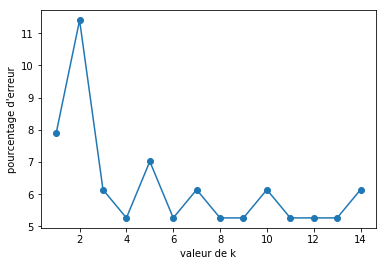

In [8]:
fig3=plt.figure("Figure 3")
ax3=fig3.add_subplot(1,1,1)
errors = []
for k in range(1,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
ax3.plot(range(1,15), errors, 'o-')
ax3.set_xlabel("valeur de k")
ax3.set_ylabel("pourcentage d'erreur")
plt.show()

In [9]:
print("On récupère le classifieur le plus performant, k = {}, et on l'utilise pour réaliser le classement en deux groupes".format(1+errors.index(min(errors))))

On récupère le classifieur le plus performant, k = 4, et on l'utilise pour réaliser le classement en deux groupes


### Modélisation avec la valeur de k retenue

On réalise la modélisation, et on récupère les valeurs prédites dans une liste. On peut ensuite comparer cette liste à l'ensemble de test pour vérifier son efficacité.

```python
knn = neighbors.KNeighborsClassifier(1+errors.index(min(errors)))
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

misclass = (ytest != predicted)
print("Pourcentage d'erreurs: {:.2f} %".format(100*np.sum(misclass)/len(misclass)))
```

In [10]:
knn = neighbors.KNeighborsClassifier(1+errors.index(min(errors)))
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

In [41]:
misclass = (ytest != predicted)
print("Pourcentage d'erreurs: {:.2f} %".format(100*np.sum(misclass)/len(misclass)))

Pourcentage d'erreurs: 6.14 %


### Statistiques

```python
estmalade = (ytest == np.zeros(ytest.shape))
testpositif = (predicted == np.zeros(ytest.shape)) #POSITIF
testnegatif = (predicted != np.zeros(ytest.shape)) #NEGATIF
enaccord = (estmalade == testpositif) #VRAI
endesaccord = (estmalade != testpositif) #FAUX

vraipositif = np.all([enaccord,testpositif],axis=0)
vrainegatif = np.all([enaccord,testnegatif],axis=0)
fauxpositif = np.all([endesaccord,testpositif],axis=0)
fauxnegatif = np.all([endesaccord,testnegatif],axis=0)

print("Vrai positif: {:.2f} %".format(100*np.sum(vraipositif)/len(ytest)))
print("Vrai negatif: {:.2f} %".format(100*np.sum(vrainegatif)/len(ytest)))
print("Faux negatif: {:.2f} %".format(100*np.sum(fauxnegatif)/len(ytest)))
print("Faux positif: {:.2f} %".format(100*np.sum(fauxpositif)/len(ytest)))
print("")
print("Est malade: {:.2f} %".format(100*(np.sum(estmalade))/len(ytest)))
print("Test positif: {:.2f} %".format(100*np.sum(testpositif)/len(ytest)))
```

In [66]:
estmalade = (ytest == np.zeros(ytest.shape))
testpositif = (predicted == np.zeros(ytest.shape)) #POSITIF
testnegatif = (predicted != np.zeros(ytest.shape)) #NEGATIF
enaccord = (estmalade == testpositif) #VRAI
endesaccord = (estmalade != testpositif) #FAUX

vraipositif = np.all([enaccord,testpositif],axis=0)
vrainegatif = np.all([enaccord,testnegatif],axis=0)
fauxpositif = np.all([endesaccord,testpositif],axis=0)
fauxnegatif = np.all([endesaccord,testnegatif],axis=0)

In [68]:
print("Vrai positif: {:.2f} %".format(100*np.sum(vraipositif)/len(ytest)))
print("Vrai negatif: {:.2f} %".format(100*np.sum(vrainegatif)/len(ytest)))
print("Faux negatif: {:.2f} %".format(100*np.sum(fauxnegatif)/len(ytest)))
print("Faux positif: {:.2f} %".format(100*np.sum(fauxpositif)/len(ytest)))
print("")
print("Est malade: {:.2f} %".format(100*(np.sum(estmalade))/len(ytest)))
print("Test positif: {:.2f} %".format(100*np.sum(testpositif)/len(ytest)))

Vrai positif: 34.21 %
Vrai negatif: 59.65 %
Faux negatif: 4.39 %
Faux positif: 1.75 %

Est malade: 38.60 %
Test positif: 35.96 %


```python
pBA=100*np.sum(vraipositif)/np.sum(estmalade)
pA=100*np.sum(estmalade)/len(ytest)
pB=100*np.sum(testpositif)/len(ytest)
print("p(B|A) = {:.2f} %".format(pBA))
print("p(A) = {:.2f} %".format(pA))
print("p(B) = {:.2f} %".format(pB))
print("p(A|B) = ({:.4f}x{:.4f})/{:.4f} = {:.2f} %".format(pBA/100,pA/100,pB/100,pBA*pA/pB))
print("")
print("Donc la probabilité d'être effectivement malade lorsque le test est positif est de {:.2f} %".format(pBA*pA/pB))
```

In [69]:
pBA=100*np.sum(vraipositif)/np.sum(estmalade)
pA=100*np.sum(estmalade)/len(ytest)
pB=100*np.sum(testpositif)/len(ytest)
print("p(B|A) = {:.2f} %".format(pBA))
print("p(A) = {:.2f} %".format(pA))
print("p(B) = {:.2f} %".format(pB))
print("p(A|B) = ({:.4f}x{:.4f})/{:.4f} = {:.2f} %".format(pBA/100,pA/100,pB/100,pBA*pA/pB))
print("")
print("Donc la probabilité d'être effectivement malade lorsque le test est positif est de {:.2f} %".format(pBA*pA/pB))

p(B|A) = 88.64 %
p(A) = 38.60 %
p(B) = 35.96 %
p(A|B) = (0.8864x0.3860)/0.3596 = 95.12 %

Donc la probabilité d'être effectivement malade lorsque le test est positif est de 95.12 %
